In [31]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

In [33]:
# Load unprocessed data
df = pd.read_csv("/mnt/dv/wid/projects5/Roy-singlecell/jiaxin_work/data/A2S/A2S_raw_UMI_counts_with_total_counts.csv",
                index_col = 0)

# Load normalized data
df_norm_sqrt = pd.read_csv("/mnt/dv/wid/projects5/Roy-singlecell/jiaxin_work/data/A2S/A2S_seqdepth_norm_sqrt.csv",
                     index_col = 0)

df_norm_log = pd.read_csv("/mnt/dv/wid/projects5/Roy-singlecell/jiaxin_work/data/A2S/A2S_seqdepth_norm_log.csv",
                     index_col = 0)


In [50]:
df_log = pd.read_csv("/mnt/dv/wid/projects5/Roy-singlecell/jiaxin_work/data/A2S/A2S_log.csv",
                     index_col = 0)


In [51]:
np.random.seed(42)
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
df_norm_train_sqrt = df_norm_sqrt[mask]
df_norm_test_sqrt =  df_norm_sqrt[~mask]
df_norm_train_log = df_norm_log[mask]
df_norm_test_log =  df_norm_log[~mask]
df_train_log = df_log[mask]
df_test_log =  df_log[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))
    

Training data set length=1702
Testing data set length=432


In [36]:
# Load the predictions
predict_NB = pd.read_csv("/mnt/dv/wid/projects5/Roy-singlecell/jiaxin_work/data/A2S/prediction_with_GRN.csv", index_col = 0)

predict_Gauss_sqrt = pd.read_csv("/mnt/dv/wid/projects5/Roy-singlecell/jiaxin_work/data/A2S/prediction_with_GRN_Gauss.csv", index_col = 0)

predict_Gauss_log = pd.read_csv("/mnt/dv/wid/projects5/Roy-singlecell/jiaxin_work/data/A2S/prediction_with_GRN_Gauss_log.csv", index_col = 0)

In [52]:
predict_Gauss_only_log = pd.read_csv("/mnt/dv/wid/projects5/Roy-singlecell/jiaxin_work/data/A2S/prediction_with_GRN_Gauss_only_log.csv", index_col = 0)

In [37]:
def pearsonCorrelation(prediction, val):
    prediction = prediction.dropna(axis = 'columns')
    ccs = pd.DataFrame(np.zeros((1, len(prediction.columns))),columns = prediction.columns)
    # For each gene in the dataset
    for gene in prediction.columns:
        v1 = val.loc[:,gene]
        v2 = prediction.loc[:,gene]
        c = pearsonr(v1, v2)
        ccs.loc[0, gene] = c[0]
    return ccs

In [54]:
predict_Gauss_only_log

,Rp1,Sox17,Mrpl15,Lypla1,Tcea1,Rgs20,Atp6v1h,Rb1cc1,Fam150a,St18,...,Zf12,Zfy1,Uba1y,Kdm5d,Eif2s3y,Uty,Ddx3y,Usp9y,Zfy2,Erdr1
0,NaN,0.179894,1.055150,1.614489,1.244864,0.362865,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.187141,1.086008,1.596580,1.240042,0.326402,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.184133,1.073201,1.639730,1.251661,0.341536,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.172647,1.024292,1.657638,1.256483,0.399328,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.187141,1.086008,1.614489,1.244864,0.326402,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,NaN,0.184133,1.073201,1.528190,1.221628,0.248961,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
428,NaN,0.213916,1.073201,1.528190,1.221628,0.341536,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
429,NaN,0.186692,1.073201,1.528190,1.221628,0.232639,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
430,NaN,0.179894,1.055150,1.571340,1.233246,0.270290,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
cc_NB = pearsonCorrelation(predict_NB, df_test)
cc_Gauss_sqrt = pearsonCorrelation(predict_Gauss_sqrt, df_norm_test_sqrt)
cc_Gauss_log = pearsonCorrelation(predict_Gauss_log, df_norm_test_log)
cc_Gauss_only_log = pearsonCorrelation(predict_Gauss_only_log, df_test_log)

/mnt/ws/home/jli/.local/lib/python3.7/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [56]:
valid_genes = cc_NB.columns.intersection(cc_Gauss_sqrt.columns).intersection(cc_Gauss_log.columns).intersection(cc_Gauss_only_log.columns)

In [61]:
ccs = cc_NB[valid_genes].append(cc_Gauss_sqrt[valid_genes])
ccs = ccs.append(cc_Gauss_log[valid_genes])
ccs = ccs.append(cc_Gauss_only_log[valid_genes])


In [63]:
ccs

,Negative Binomial,Conditional Gaussian sqrt,Conditional Gaussian log,Conditional Gaussian only log
Sox17,0.034823,0.105443,0.103355,0.122284
Mrpl15,0.456967,0.101784,0.107201,0.168677
Lypla1,0.495613,0.068394,0.057310,0.338625
Tcea1,0.136699,0.042887,0.031123,0.139387
Rgs20,0.375795,0.273193,0.258124,0.251107
...,...,...,...,...
Gpm6b,0.179733,0.146135,0.149998,0.100506
Tceanc,0.137875,0.050007,0.044890,0.094953
Egfl6,0.052477,0.055219,0.057247,0.053521
Tmsb4x,0.666389,0.388413,0.417793,0.344549


In [62]:
ccs = ccs.T
ccs.columns = ["Negative Binomial", "Conditional Gaussian sqrt", "Conditional Gaussian log", "Conditional Gaussian only log"]

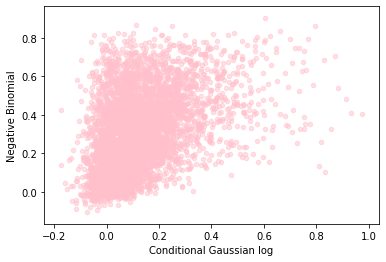

In [43]:
ccs.plot.scatter(x = "Conditional Gaussian log", y = "Negative Binomial", color = 'pink', alpha = 0.5)

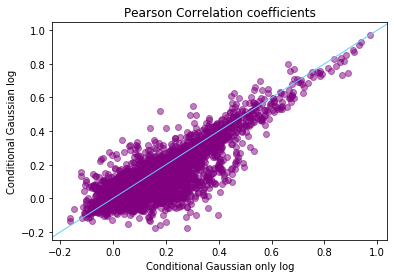

In [65]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(ccs["Conditional Gaussian only log"], ccs["Conditional Gaussian log"], alpha = 0.5, color = "purple")
xpoints = ypoints = plt.xlim()
ax.plot(xpoints, ypoints, linestyle='-', color='#66CCFF', lw=1, scalex=False, scaley=False)
ax.set_xlabel("Conditional Gaussian only log")
ax.set_ylabel("Conditional Gaussian log")
ax.set_title(f"Pearson Correlation coefficients")
fig.savefig('NB_vs_Gauss_sqrt_CC.png', dpi=300)

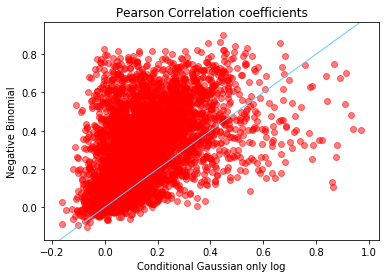

In [64]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(ccs["Conditional Gaussian only log"], ccs["Negative Binomial"], alpha = 0.5, color = "red")
xpoints = ypoints = plt.xlim()
ax.plot(xpoints, ypoints, linestyle='-', color='#66CCFF', lw=1, scalex=False, scaley=False)
ax.set_xlabel("Conditional Gaussian only log")
ax.set_ylabel("Negative Binomial")
ax.set_title(f"Pearson Correlation coefficients")
fig.savefig('NB_vs_Gauss_sqrt_CC.png', dpi=300)

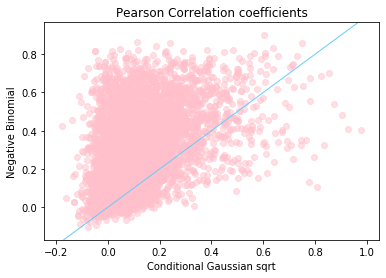

In [44]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(ccs["Conditional Gaussian sqrt"], ccs["Negative Binomial"], alpha = 0.5, color = "pink")
xpoints = ypoints = plt.xlim()
ax.plot(xpoints, ypoints, linestyle='-', color='#66CCFF', lw=1, scalex=False, scaley=False)
ax.set_xlabel("Conditional Gaussian sqrt")
ax.set_ylabel("Negative Binomial")
ax.set_title(f"Pearson Correlation coefficients")
fig.savefig('NB_vs_Gauss_sqrt_CC.png', dpi=300)

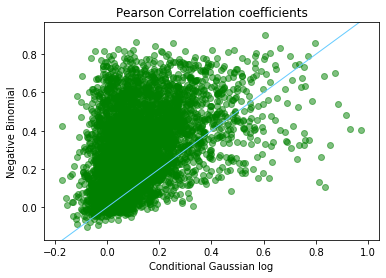

In [48]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(ccs["Conditional Gaussian log"], ccs["Negative Binomial"], alpha = 0.5, color = "green")
xpoints = ypoints = plt.xlim()
ax.plot(xpoints, ypoints, linestyle='-', color='#66CCFF', lw=1, scalex=False, scaley=False)
ax.set_xlabel("Conditional Gaussian log")
ax.set_ylabel("Negative Binomial")
ax.set_title(f"Pearson Correlation coefficients")
fig.savefig('NB_vs_Gauss_log_CC.png', dpi=300)

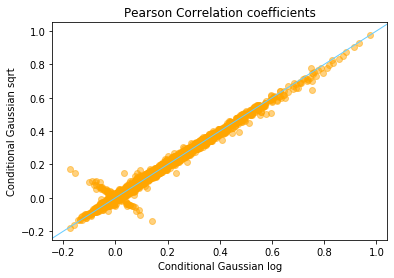

In [49]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(ccs["Conditional Gaussian log"], ccs["Conditional Gaussian sqrt"], alpha = 0.5, color = "orange")
xpoints = ypoints = plt.xlim()
ax.plot(xpoints, ypoints, linestyle='-', color='#66CCFF', lw=1, scalex=False, scaley=False)
ax.set_xlabel("Conditional Gaussian log")
ax.set_ylabel("Conditional Gaussian sqrt")
ax.set_title(f"Pearson Correlation coefficients")
fig.savefig('Gauss_sqrt_vs_Gauss_log_CC.png', dpi=300)

In [9]:
predict_NB

,Rp1,Sox17,Mrpl15,Lypla1,Tcea1,Rgs20,Atp6v1h,Rb1cc1,Fam150a,St18,...,Uba1y,Kdm5d,Eif2s3y,Uty,Ddx3y,Usp9y,Zfy2,Erdr1,total_count,log_total_count
cttgaagagtgaggattg-0,NaN,0.004410,4.887223,8.980956,0.924384,1.002624,5.325886,2.330159,0.438750,NaN,...,0.034068,0.086650,0.752765,0.082640,0.755512,0.015209,NaN,2.241697,NaN,NaN
ccgatgcgaaaggagctt-0,NaN,0.005476,4.981699,8.047272,0.791250,0.633433,4.910215,2.111659,0.378217,NaN,...,0.032456,0.084091,0.729939,0.081835,0.729079,0.014730,NaN,2.169170,NaN,NaN
gaaataacccaactatta-0,NaN,0.005009,4.568666,8.659188,0.963031,0.707292,4.651211,1.977460,0.342566,NaN,...,0.031424,0.082427,0.715103,0.081302,0.711968,0.014419,NaN,2.122114,NaN,NaN
agacccgagcttgagctt-0,NaN,0.004113,4.145961,9.261353,1.119284,0.992126,4.583124,1.942439,0.333459,NaN,...,0.031149,0.081979,0.711118,0.081158,0.707382,0.014335,NaN,2.109486,NaN,NaN
cactgtggtagggagctt-0,NaN,0.005811,3.926109,6.509400,0.658274,0.437922,3.661944,1.480027,0.221311,NaN,...,0.027247,0.075467,0.653153,0.078993,0.641130,0.013123,NaN,1.926356,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ggacgatctagcagcacg-7,NaN,0.008801,0.477689,0.649804,0.051407,0.018638,0.288131,0.067987,0.002127,NaN,...,0.005982,0.029542,0.249247,0.058150,0.210407,0.004823,NaN,0.688452,NaN,NaN
gcttgtttaagattgctc-7,NaN,0.019379,0.458796,0.622633,0.049142,0.020060,0.274158,0.064013,0.001942,NaN,...,0.005807,0.029005,0.244596,0.057803,0.205872,0.004730,NaN,0.674740,NaN,NaN
gcttgtcaccacccgatg-7,NaN,0.008357,0.430184,0.581611,0.045733,0.012078,0.253252,0.058147,0.001680,NaN,...,0.005539,0.028168,0.237354,0.057253,0.198839,0.004585,NaN,0.653423,NaN,NaN
aacgtgcgagcaacggac-7,NaN,0.008289,0.389857,0.570556,0.046633,0.017369,0.236407,0.053495,0.001482,NaN,...,0.005316,0.027462,0.231243,0.056780,0.192931,0.004462,NaN,0.635472,NaN,NaN


In [10]:
predict_Gauss

,Rp1,Sox17,Mrpl15,Lypla1,Tcea1,Rgs20,Atp6v1h,Rb1cc1,Fam150a,St18,...,Zf12,Zfy1,Uba1y,Kdm5d,Eif2s3y,Uty,Ddx3y,Usp9y,Zfy2,Erdr1
0,NaN,0.120239,0.627494,0.924798,0.708092,0.256837,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.127084,0.648540,0.921417,0.706875,0.216263,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.124592,0.640875,0.933256,0.711136,0.231039,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.111694,0.601220,0.939168,0.713264,0.307492,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.129413,0.655699,0.929211,0.709680,0.202461,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,NaN,0.160756,0.752066,0.902409,0.700034,-0.582029,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
428,NaN,0.300994,0.755712,0.902409,0.700034,0.009646,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
429,NaN,0.176861,0.761713,0.902409,0.700034,-0.733465,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
430,NaN,0.149846,0.718521,0.960119,0.720804,-0.577066,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
